In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from ant_colony import AntColonyOptimization
import adjacency_mat_generator
from matplotlib.ticker import MaxNLocator
import seaborn as sns


In [2]:
n_ants_trials = [1, 5, 10, 20]
degradation_factor_trials = [0.1, 0.3, 0.5, 0.9]
n_iterations = [1, 5, 10, 50, 100]

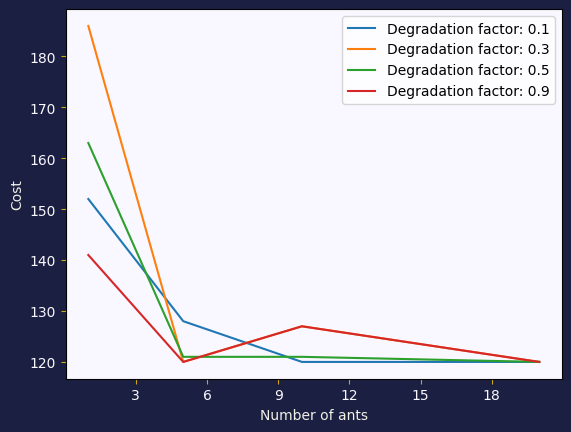

In [42]:
n_ants_cost = defaultdict(list)
for degradation_factor in degradation_factor_trials:
    for n_ants in n_ants_trials:
        aco = AntColonyOptimization(adjacency_mat_generator.random_adjacency_mat(10, 12), 10)
        cost = aco.optimize(50, n_ants, degradation_factor=degradation_factor)[1]
        n_ants_cost[str(degradation_factor)].append(cost)

fig, ax = plt.subplots(facecolor='#1B1F42')
ax.set_facecolor('#F9F7FF')
for key, value in n_ants_cost.items():
    ax.plot(n_ants_trials, value, label=f'Degradation factor: {key}')
    
ax.set_xlabel('Number of ants', color='#F1F1E6')
ax.set_ylabel('Cost', color='#F1F1E6')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.tick_params(color='#CDA715', labelcolor='#F9F7FF')
legend = ax.legend()
plt.show()

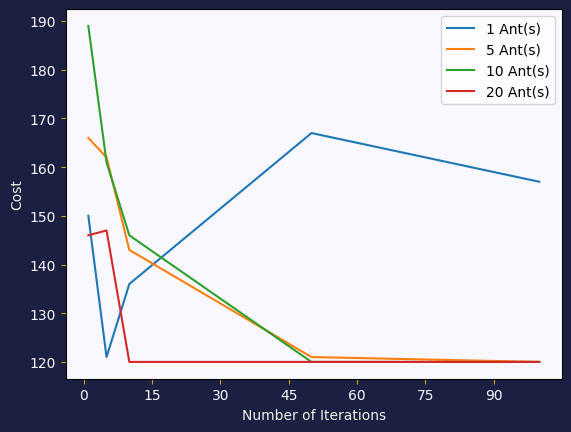

In [4]:
iter_cost = defaultdict(list)
for n_ants in n_ants_trials:
    for iter in n_iterations:
        aco = AntColonyOptimization(adjacency_mat_generator.random_adjacency_mat(10, 12), 10)
        cost = aco.optimize(iter, n_ants)[1]
        iter_cost[str(n_ants)].append(cost)

fig, ax = plt.subplots(facecolor='#1B1F42')
ax.set_facecolor('#F9F7FF')
for key, value in iter_cost.items():
    ax.plot(n_iterations, value, label=f'{key} Ant(s)')
    
ax.set_xlabel('Number of Iterations', color='#F1F1E6')
ax.set_ylabel('Cost', color='#F1F1E6')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.tick_params(color='#CDA715', labelcolor='#F9F7FF')
legend = ax.legend()
plt.show()